In [ ]:
#DSBDA practical 2
# load the datasets
# Display The Basic Information
# Display statistical information
# Display null Values
# Fill the Null Value
# Quantization (Encoding): Convert categorical to numerical Variable
# Handle outliers
# Handle skewed data



In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [25]:
df=pd.read_csv('academic.csv')

In [49]:
def DetectOutlier(df,var):
 # IQR method is used to deal with outliers
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR

 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
 df1 = df[((df[var] < low) | (df[var] > high))] #these are outliers
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))] #now filter out data which is not outlier
 return(df)
    


In [26]:
print('Information of Datasets:\n',df.info)

Information of Datasets:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        

In [28]:
print('Shape of Datasets:\n',df.shape)

Shape of Datasets:
 (480, 17)


In [29]:
print('Columns Name:\n',df.columns)

Columns Name:
 Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [30]:
df.size

8160

In [31]:
df.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources              int64
AnnouncementsView             int64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [35]:
df.head().T

,0,1,2,3,4
gender,M,M,M,M,M
NationalITy,KW,KW,KW,KW,KW
PlaceofBirth,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT
StageID,lowerlevel,lowerlevel,lowerlevel,lowerlevel,lowerlevel
GradeID,G-04,G-04,G-04,G-04,G-04
SectionID,A,A,A,A,A
Topic,IT,IT,IT,IT,IT
Semester,F,F,F,F,F
Relation,Father,Father,Father,Father,Father
raisedhands,15.0,NaN,10.0,30.0,0.0


In [36]:
df.tail().T

,475,476,477,478,479
gender,F,F,F,F,F
NationalITy,Jordan,Jordan,Jordan,Jordan,Jordan
PlaceofBirth,Jordan,Jordan,Jordan,Jordan,Jordan
StageID,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool
GradeID,G-08,G-08,G-08,G-08,G-08
SectionID,A,A,A,A,A
Topic,Chemistry,Geology,Geology,History,History
Semester,S,F,S,F,S
Relation,Father,Father,Father,Father,Father
raisedhands,5.0,50.0,55.0,30.0,35.0


In [37]:
df.sample(5).T

,66,194,47,135,148
gender,F,M,F,F,F
NationalITy,KW,Morocco,KW,Egypt,Jordan
PlaceofBirth,KuwaIT,Morocco,KuwaIT,Egypt,Jordan
StageID,HighSchool,MiddleSchool,HighSchool,MiddleSchool,MiddleSchool
GradeID,G-12,G-08,G-12,G-07,G-07
SectionID,A,A,A,A,A
Topic,English,Arabic,English,Quran,Quran
Semester,F,S,F,S,S
Relation,Father,Mum,Mum,Mum,Father
raisedhands,25.0,53.0,70.0,70.0,60.0


In [38]:
print("Statistical information of Numerical columns:\n",df.describe().T)

Statistical information of Numerical columns:
                    count       mean        std  min   25%   50%   75%    max
raisedhands        478.0  46.939331  31.375699  0.0  15.0  50.0  75.0  170.0
VisITedResources   480.0  54.797917  33.080007  0.0  20.0  65.0  84.0   99.0
AnnouncementsView  480.0  37.918750  26.611244  0.0  14.0  33.0  58.0   98.0
Discussion         480.0  43.283333  27.637735  1.0  20.0  39.0  70.0   99.0


In [39]:
print("Total Number of Null Values:\n",df.isna().sum())

Total Number of Null Values:
 gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [40]:
#converting a categorical to numeric using find and replace method
df['Relation']=df['Relation'].astype('category')
df['Relation']=df['Relation'].cat.codes

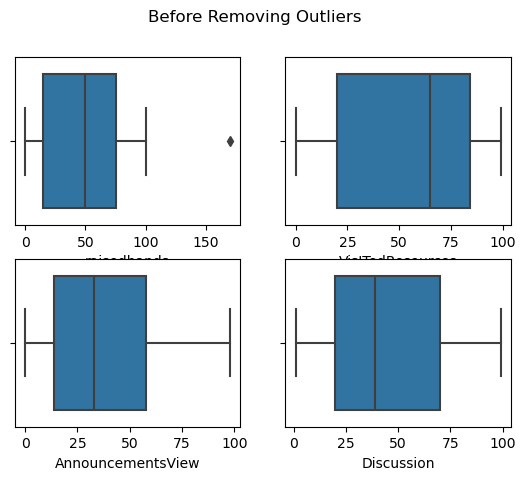

In [48]:
#outlies can be visualized using boxplot
# using seaborn library we can plot the boxplot

fig, axes = plt.subplots(2,2)
fig.suptitle('Before Removing Outliers')
sns.boxplot(data = df, x='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x='Discussion', ax=axes[1,1])
plt.show()

In [51]:
df = DetectOutlier(df,'raisedhands')

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


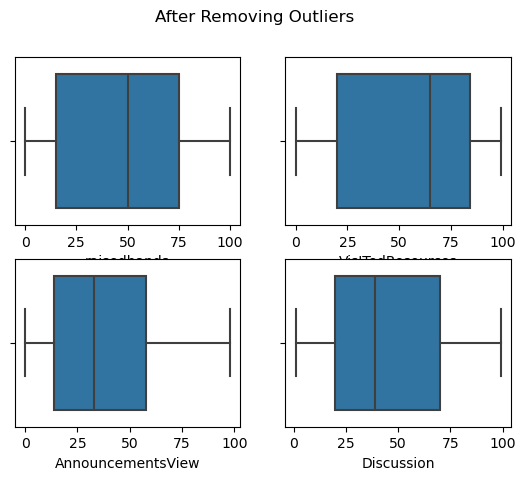

In [52]:
#outlies can be visualized using boxplot
# using seaborn library we can plot the boxplot

fig, axes = plt.subplots(2,2)
fig.suptitle('After Removing Outliers')
sns.boxplot(data = df, x='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x='Discussion', ax=axes[1,1])
plt.show()

In [53]:
print('---------------- Data Skew Values before Yeo John Transformation ----------------------')

---------------- Data Skew Values before Yeo John Transformation ----------------------


In [55]:
print('raisedhands: ', df['raisedhands'].skew())


raisedhands:  0.02842019812567035


In [57]:
print('VisITedResources: ', df['VisITedResources'].skew())
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

VisITedResources:  -0.3487897627878132
AnnouncementsView:  0.39686773835939115
Discussion:  0.3551177986213502


In [58]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Discussion', ylabel='Count'>

In [59]:

from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))

C:\Users\HP\AppData\Local\Temp\ipykernel_3704\3327058018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
C:\Users\HP\AppData\Local\Temp\ipykernel_3704\3327058018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))


In [60]:

print('---------------- Data Skew Values after Yeo John Transformation ----------------------')
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())


---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView:  -0.1809444188780711
Discussion:  -0.13562031522282225


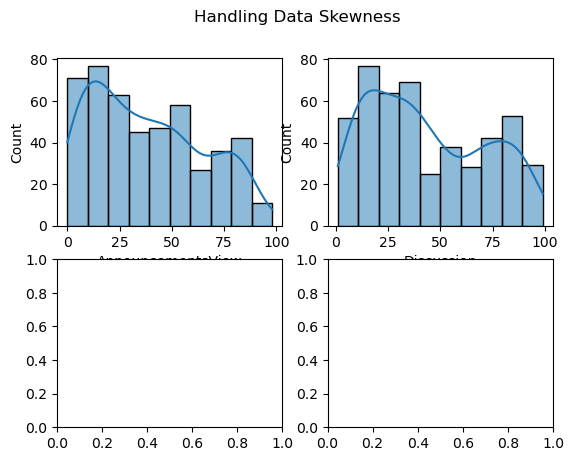

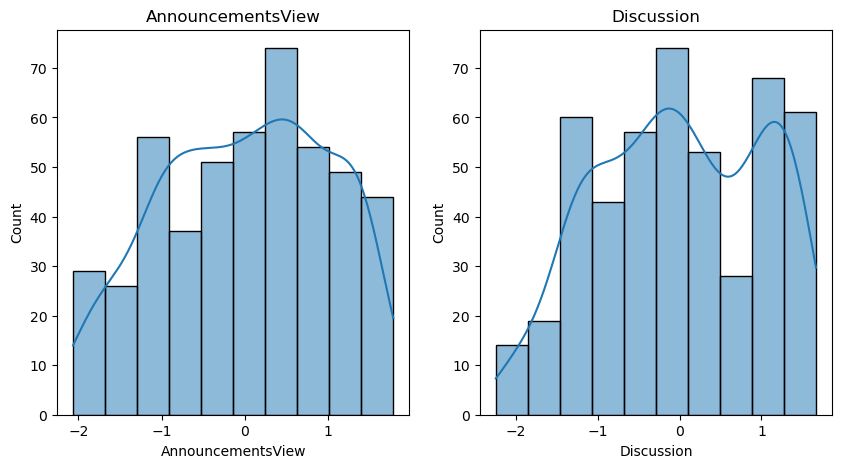

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Create a figure with 2x1 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the histogram for AnnouncementsView
sns.histplot(ax=axes[0], data=df['AnnouncementsView'], kde=True)
axes[0].set_title('AnnouncementsView')

# Plot the histogram for Discussion
sns.histplot(ax=axes[1], data=df['Discussion'], kde=True)
axes[1].set_title('Discussion')

# Show the plot
plt.show()